#  **HandWritten Digit Recognition**

In [ ]:
!pip install keras
!pip  install tensorflow

#  **Import the libraries and load the dataset**

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import  numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


import seaborn as sns
import matplotlib.pyplot as plt

**The MNIST dataset:**



*  The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.



In [ ]:
(x_train , y_train) , (x_test , y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("shape pf x_train:", x_train.shape)
print("shape pf y_train:", y_train.shape)
print("shape pf x_test:", x_test.shape)
print("shape pf y_test:", y_test.shape)

shape pf x_train: (60000, 28, 28)
shape pf y_train: (60000,)
shape pf x_test: (10000, 28, 28)
shape pf y_test: (10000,)


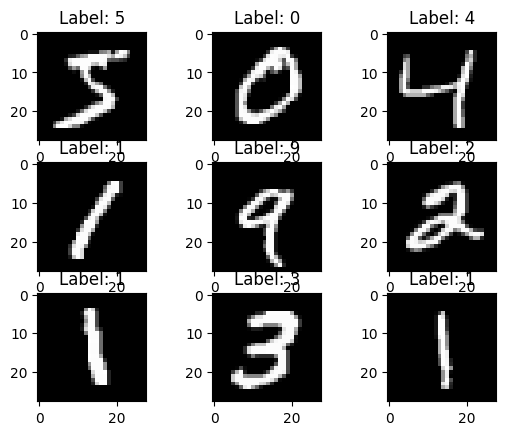

In [ ]:
# plot first few images
for i in range(9):
 plt.subplot(330 + 1 + i)   # define subplot
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 plt.title("Label: {}".format(y_train[i]))  # Add label to the plot
plt.show()

# **Preprocess the data**

## **one hot encoding**






* In the context of MNIST, the class labels represent the digits (0 through 9). Therefore, when working with the MNIST dataset, you often use one-hot encoding to convert the class labels into a format suitable for training a neural network.






* The to_categorical function from Keras is used to perform one-hot encoding on the class labels. After this transformation, each class label is represented as a binary vector, where the index corresponding to the digit is set to 1, and all other indices are set to 0.




In [ ]:
# convert class label to binary vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## **Normalization**

In [ ]:
# Normalize pixel values to be between 0 and 1
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train /= 255
x_test /= 255

*   Data has a shape of (60,000, 28, 28), indicating that there are 60,000 images,each with a size of 28 pixels in height and 28 pixels in width. However, this data lacks explicit channel information. CNN models are specialized for working with image data, and they expect the input to have a specific shape: (Number of Samples, Height, Width, Channels).  



* Since grayscale images have one channel, we need to add a channel dimension to the data. Therefore, reshaping transforms the data from (60,000, 28, 28) to (60,000, 28, 28, 1), indicating one channel for each pixel.



In [ ]:
# reshape dataset to have a single channel
x_train =x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


## Model Building:Deep learning


## **CNN Model**

In [ ]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 128)        

In [ ]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 115s 150ms/step - loss: 0.2938 - accuracy: 0.9059 - val_loss: 0.0608 - val_accuracy: 0.9816
Epoch 2/20
750/750 [==============================] - 108s 143ms/step - loss: 0.0998 - accuracy: 0.9689 - val_loss: 0.0484 - val_accuracy: 0.9858
Epoch 3/20
750/750 [==============================] - 111s 149ms/step - loss: 0.0828 - accuracy: 0.9747 - val_loss: 0.0403 - val_accuracy: 0.9889
Epoch 4/20
750/750 [==============================] - 107s 142ms/step - loss: 0.0678 - accuracy: 0.9790 - val_loss: 0.0353 - val_accuracy: 0.9902
Epoch 5/20
750/750 [==============================] - 111s 148ms/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.0378 - val_accuracy: 0.9892
Epoch 6/20
750/750 [==============================] - 106s 141ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0307 - val_accuracy: 0.9910
Epoch 7/20
750/750 [==============================] - 111s 148ms/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0310 -

In [ ]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 6s 19ms/step - loss: 0.0182 - accuracy: 0.9942


[0.018197566270828247, 0.9941999912261963]

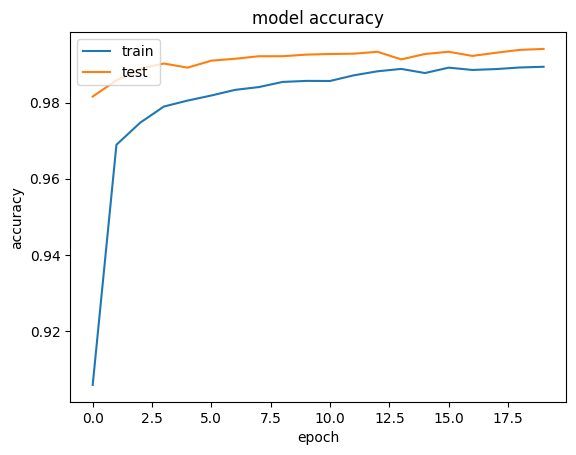

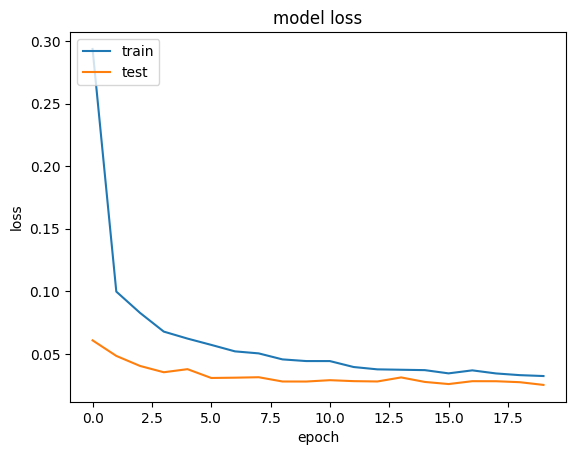

In [ ]:
# Model Performance Charts

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')


plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


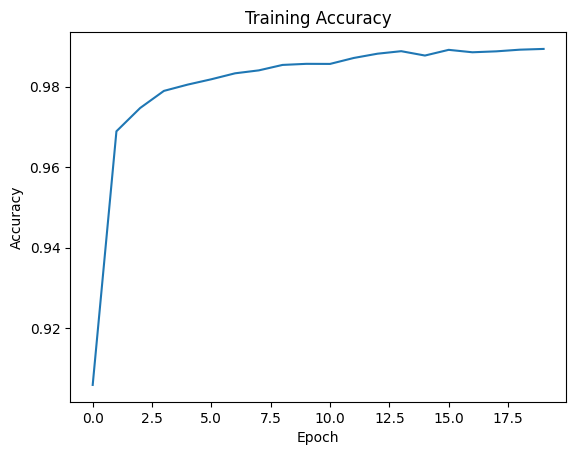

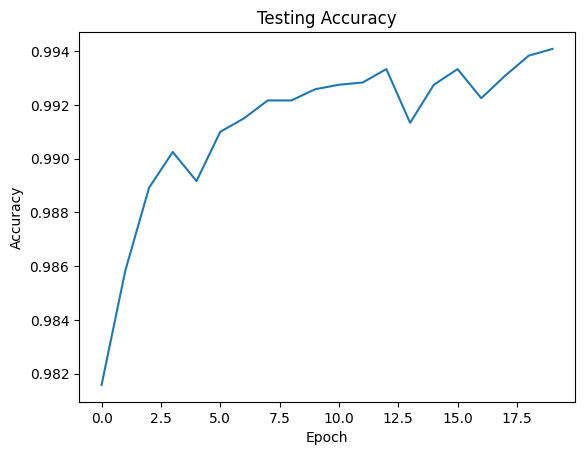

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(hist.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot testing accuracy
plt.plot(hist.history['val_accuracy'])
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


313/313 [==============================] - 7s 21ms/step


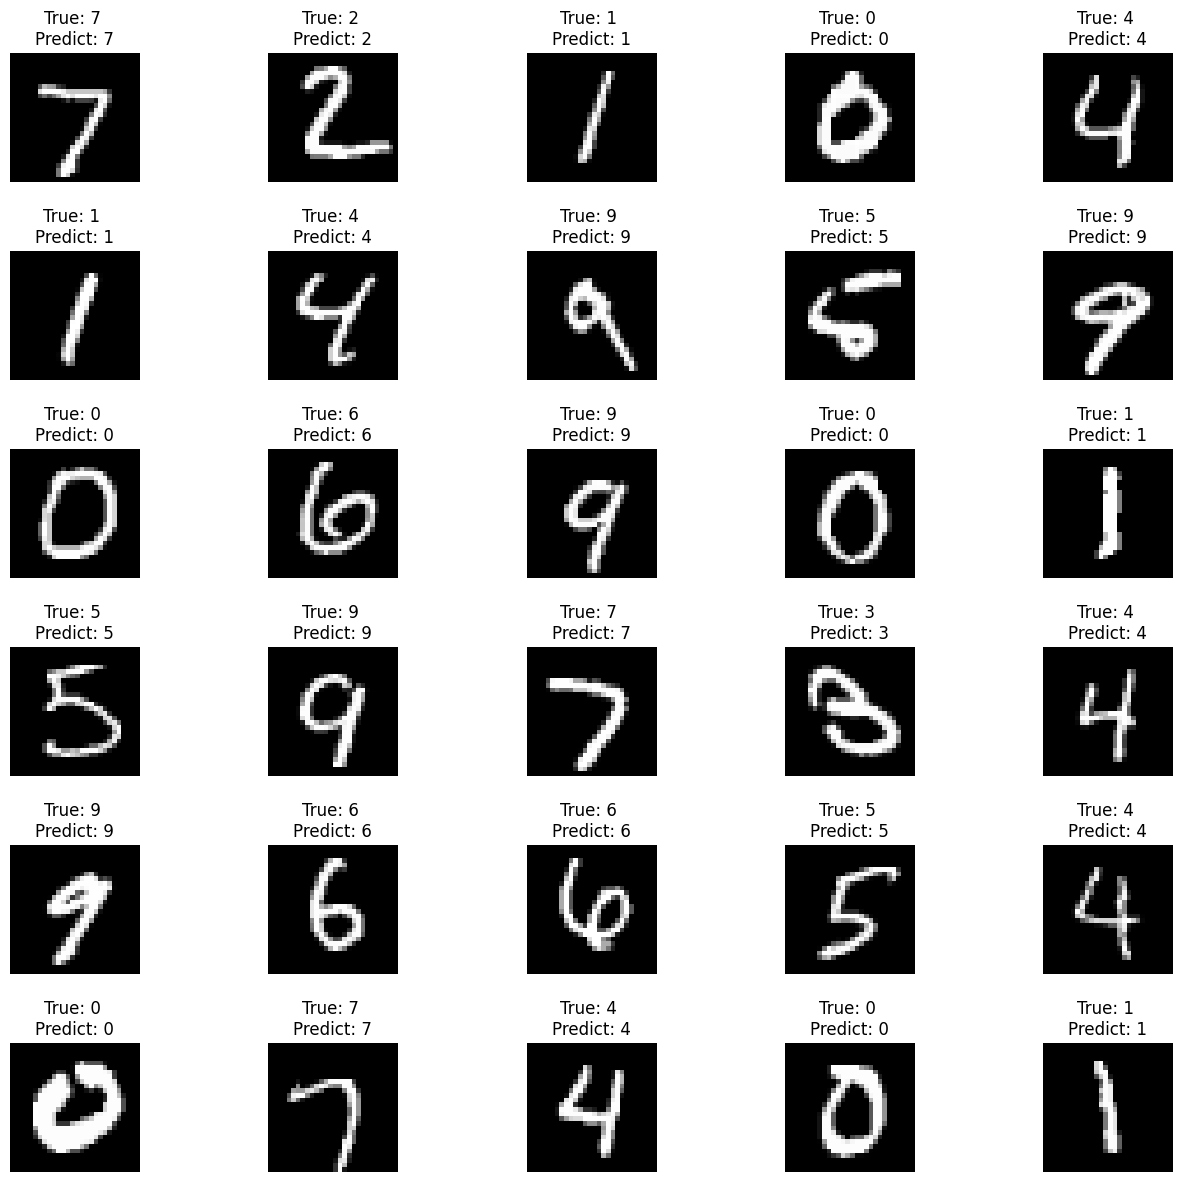

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

fig, axes = plt.subplots(6, 5, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 30):
    # Display the original images (scaled back to [0, 255])
    axes[i].imshow((x_test[i] * 255).astype(np.uint8), cmap='gray')

    # Set titles with true and predicted labels
    axes[i].set_title("True: %s \nPredict: %s" % (classes[np.argmax(y_test[i])], classes[y_pred_classes[i]]))

    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()



In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

#  classification report
print(classification_report(y_true, y_pred_classes))


313/313 [==============================] - 7s 23ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



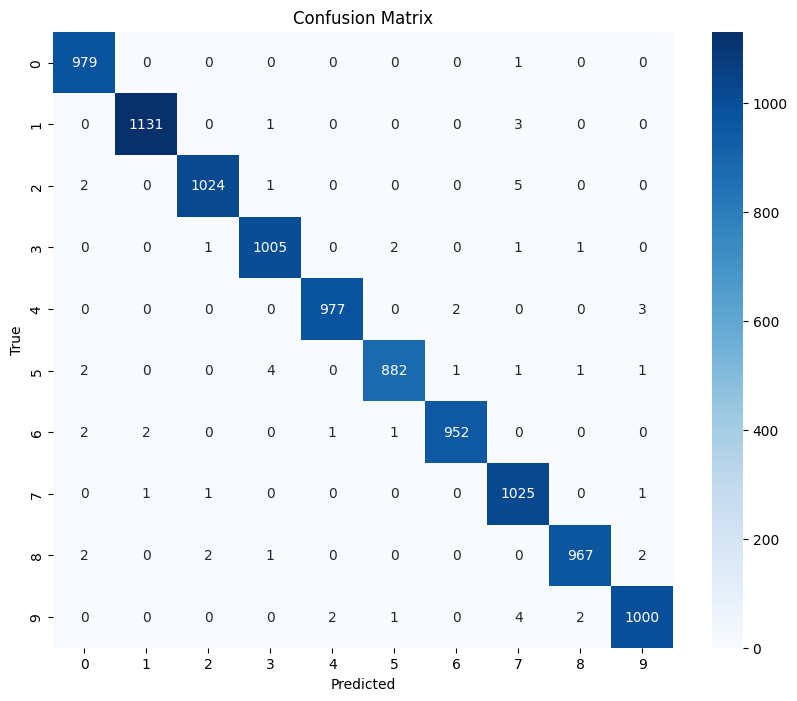

In [ ]:
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [1]:
# pretrained model